In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def add_gaussian_noise(image, mean=0, sigma=25):
    noise = np.random.normal(mean, sigma, image.shape)
    noisy_image = np.clip(image + noise, 0, 255)
    return noisy_image.astype(np.uint8)

def add_salt_and_pepper_noise(image, amount=0.05):
    noisy_image = np.copy(image)
    
    # Salt (white pixels)
    num_salt = np.ceil(amount * image.size * 0.5)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    noisy_image[tuple(coords)] = 255

    # Pepper (black pixels)
    num_pepper = np.ceil(amount * image.size * 0.5)
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    noisy_image[tuple(coords)] = 0
    
    return noisy_image

def plot_image_and_histogram(image, title):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray', vmin=0, vmax=255)
    plt.title(f'{title} Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.hist(image.ravel(), bins=256, range=[0, 256], color='blue', alpha=0.7)
    plt.title(f'{title} Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
def add_impulse_noise(image, amount=0.05):
    noisy_image = np.copy(image)
    
    num_noise_pixels = int(amount * image.size)
    
    rows = np.random.randint(0, image.shape[0], num_noise_pixels)
    cols = np.random.randint(0, image.shape[1], num_noise_pixels)
    
    random_values = np.random.randint(0, 256, num_noise_pixels)
    noisy_image[rows, cols] = random_values
    
    return noisy_image

--- Original Image ---


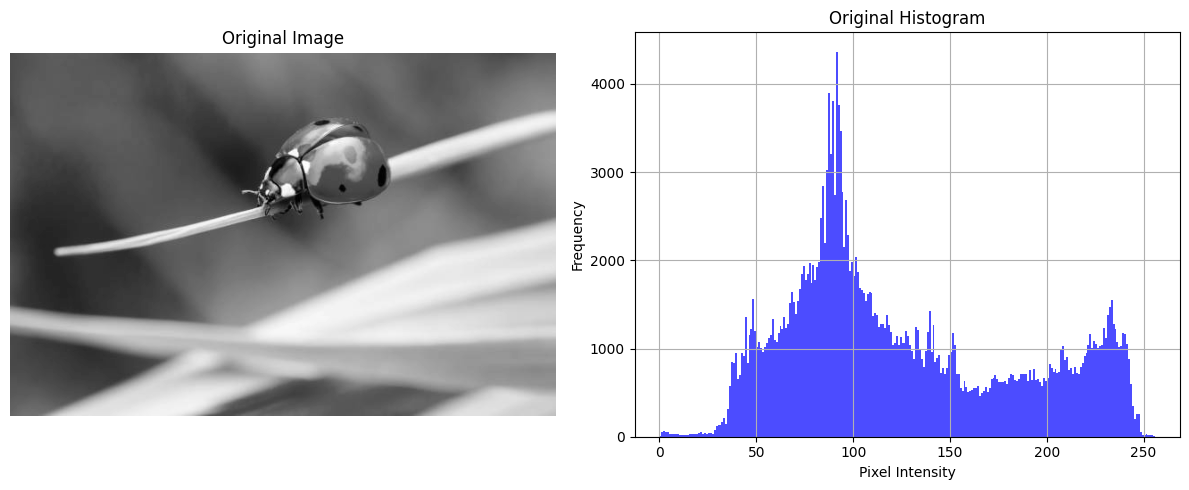

In [3]:
image_path = 'ladybug1.jpg'

original_color_image = cv2.imread(image_path)

original_image = cv2.cvtColor(original_color_image, cv2.COLOR_BGR2GRAY)
    
print("--- Original Image ---")
plot_image_and_histogram(original_image, 'Original')

--- Applying Gaussian Noise ---


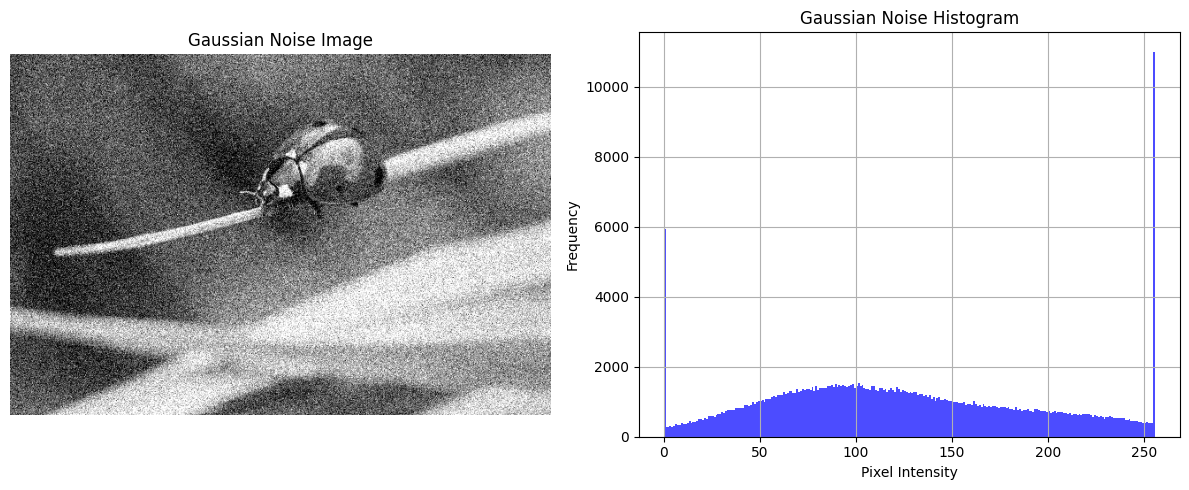

In [4]:
print("--- Applying Gaussian Noise ---")
gaussian_noisy_image = add_gaussian_noise(original_image, sigma=40)
plot_image_and_histogram(gaussian_noisy_image, 'Gaussian Noise')

--- Applying Salt & Pepper Noise ---


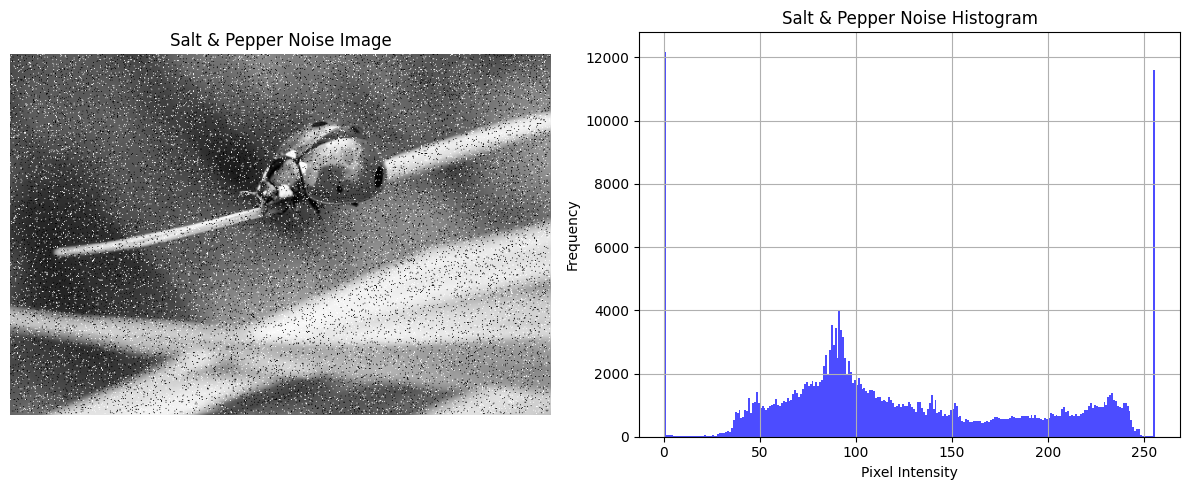

In [5]:
print("--- Applying Salt & Pepper Noise ---")
sp_noisy_image = add_salt_and_pepper_noise(original_image, amount=0.1)
plot_image_and_histogram(sp_noisy_image, 'Salt & Pepper Noise')

--- Applying Random-Valued Impulse Noise ---


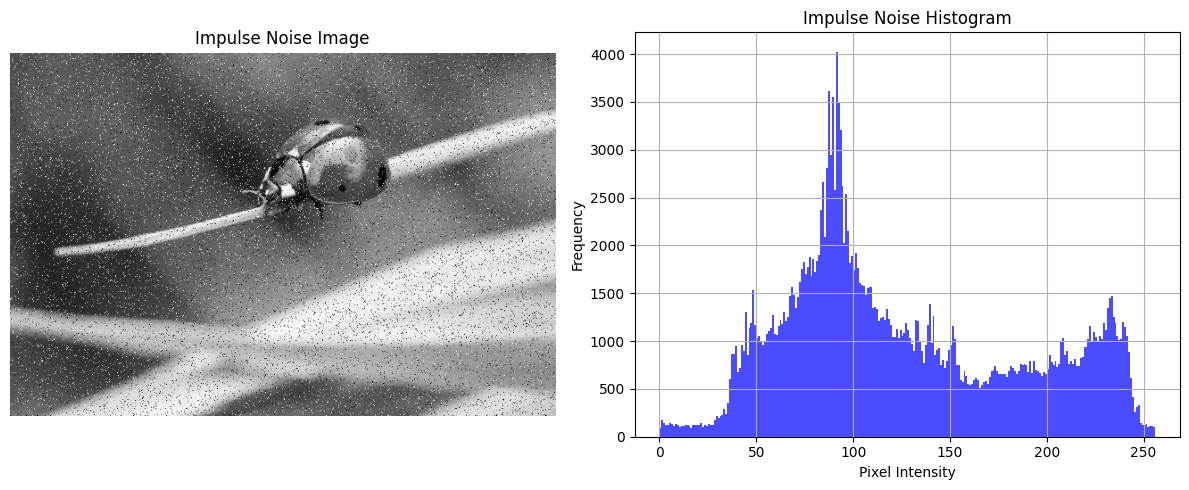

In [6]:
print("--- Applying Random-Valued Impulse Noise ---")
impulse_noisy_image = add_impulse_noise(original_image, amount=0.1)
plot_image_and_histogram(impulse_noisy_image, 'Impulse Noise')